# Notebook to show some predictions for the dataset UrbanSound8K

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import librosa
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Load the model

In [3]:
# load the tensorflow model
model = tf.keras.models.load_model('models/best_model.h5')
target_size = (500, 500)

id2class = {'0': 'air_conditioner',
            '1': 'car_horn',
            '2': 'children_playing',
            '3': 'dog_bark',
            '4': 'drilling',
            '5': 'engine_idling',
            '6': 'gun_shot',
            '7': 'jackhammer',
            '8': 'siren',
            '9': 'street_music'}

## Load a random audio file

In [4]:
# load a random audio file
fold = np.random.choice(os.listdir('audio'))

path = 'audio' +os.sep+ fold +os.sep

audios = [audio for audio in os.listdir(path) if audio.endswith('.wav')]

file_name = np.random.choice(audios)
file = path + file_name

print('File:', file_name)
x, sr = librosa.load(file, sr=None)
Audio(file, rate=sr)

File: 183894-1-7-0.wav


Text(0.5, 1.0, 'Audio Waveform')

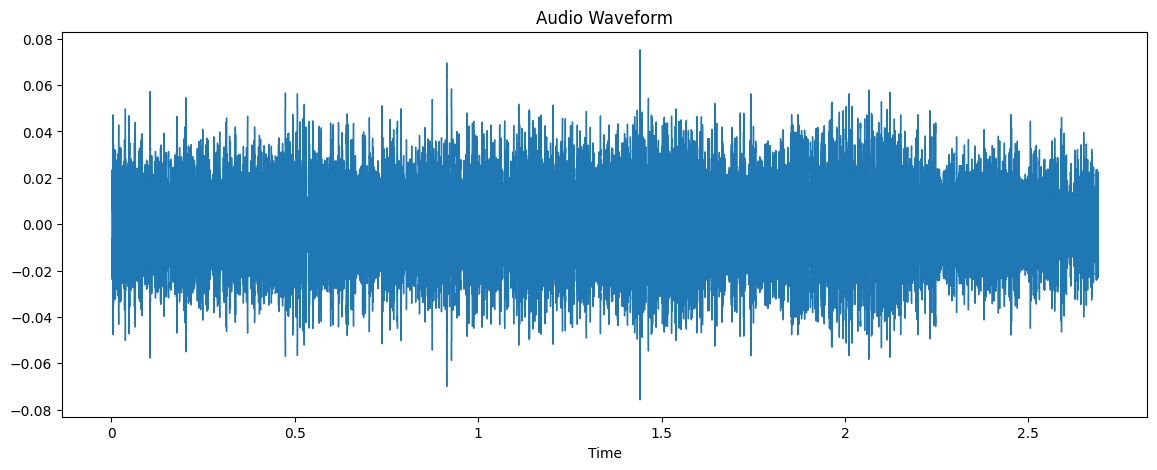

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.title('Audio Waveform')

Text(0.5, 1.0, 'Spectrogram')

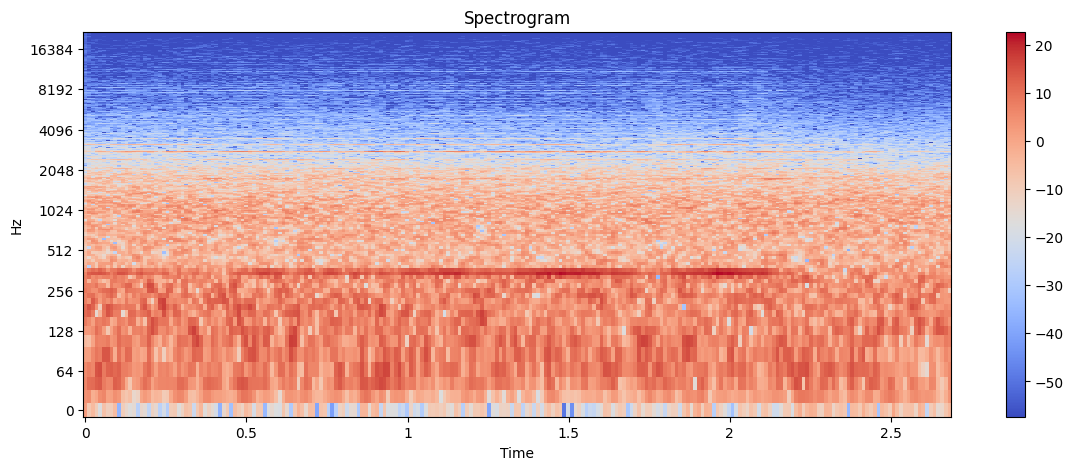

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Spectrogram')

## Predict the urban sound

In [7]:
image = tf.keras.utils.load_img('images'+os.sep+fold+os.sep+file_name+'.png', target_size=target_size)

img_array = tf.keras.utils.img_to_array(image)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model(img_array)[0]
predictions = tf.nn.softmax(predictions)
predictions = predictions.numpy()
print(predictions)

predicted_class = id2class[str(predictions.argmax(axis=-1))]
real_class = id2class[file_name.split('-')[1]]

# print the prediction
print(f"Predicted sound: {predicted_class} with probability: {predictions.max()*100}")
print("Actual sound:", real_class)
if predicted_class == real_class:
    print("*** Correct prediction! ***")

[0.08533675 0.23196931 0.08533675 0.08533675 0.08533675 0.08533675
 0.08533675 0.08533675 0.08533675 0.08533675]
Predicted sound: car_horn with probability: 23.196931183338165
Actual sound: car_horn
*** Correct prediction! ***
